# Heart Rate Variability (HRV) Exercice

Based on the NeuroKit2 [HRV](https://neuropsychology.github.io/NeuroKit/examples/ecg_hrv/ecg_hrv.html) example.

**Please feel free to work in groups of 2!**

### About the **exercice**

This exercise uses the neurokit2 package together with data measured in class - ideally 5 min ecg data from you! The goal is to visualize and analyse your HRV. It's important to clean the data and to remove artifacts. In order to see the effects of the data cleaning and artifact removal, proceed as follows.
1. Run the script with your data **without** any cleaning and make it copy of the jupyter notebook afterwards
2. Start preprocessing (cleaning and artifact removal) in the copy as described in section 3 and 4. To goal is to get a HRV interval distribution without outliers (see section 6).
3. You will end up with two notebook versions, raw and clean. Compare the metrics of both versions. 


Reference: More about HRV metrics can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5624990).


## [0. Install packages]

Only if you haven't done so yet. We use two packages:
- neurokit2: A Python toolbox for neurophysiological signal processing.
- plotly: An interactive graphing library for Python.

Use the following commands in a python code cell

```python
! pip install neurokit2 plotly 
```

We use data measured with the [DuoEK](https://checkmecare.com/products/ecg-monitor-duoek) device from Checkme. The sampling rate is approximately 127Hz. In a first step import the data

In [1]:
# Define the constants
FILE_NAME = 'R20240305142442.txt'   # File name of YOUR ecg data
SAMPLING_RATE = 127 # Hz

# Load packages
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
with open(FILE_NAME, 'r') as f:
    txt = f.read()

ecg_raw = [int(x) for x in txt.split(',')[4:]]
seconds = np.round(len(ecg_raw)/SAMPLING_RATE).astype(int)
print('Duration of measurement:', int(seconds/60), 'minutes and', seconds%60, 'second(s)')

Duration of measurement: 5 minutes and 1 second(s)


## 2. Visualize the data

Usually there are artifacts in the data. Therefore it is good to visualize it. The plotly visualization function allows to zoom in and to see details of the data. 

**To do:** Inspect the raw data. What kind if artifacts do you see?

Movement of the body, talking, coughing, etc. can cause artifacts in the data.
14:05

In [3]:
# Useful plotting function to visualize the ECG signal and its R-peaks interactively
def plotly_peak_plot(ecg_signal, sampling_rate):
    ecg_signal = np.array(ecg_signal)
    seconds = np.arange(len(ecg_signal))/sampling_rate
    _, info = nk.ecg_peaks(ecg_signal, sampling_rate=sampling_rate)
    r_peaks = info['ECG_R_Peaks']

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=seconds, y=ecg_signal, mode='lines', name='ECG signal'))
    fig.add_trace(go.Scatter(x=seconds[r_peaks], y=ecg_signal[r_peaks], mode='markers', name='R peaks'))
    fig.update_layout(title='R-peak inspection', xaxis_title='Seconds', yaxis_title='Amplitude')
    fig.show()

# Plot the ECG signal and its R-peaks
plotly_peak_plot(ecg_raw, SAMPLING_RATE)

## 3. Clean the data

**Important In a first step, skip this point and continue with the raw data by just setting `ecg_clean = ecg_raw`. Move to point 4 to calculate the HRV**.

- Use the function [ecg_clean](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-clean) to clean the data. Try out different methods, mentioned in the link. 
- zoom in to see the which method works best
- **Moodle Quiz:** Please indicate in the moodle quiz which method worked best for you.  

In [4]:
# use neurokit2 ecg_clean-method in a second step here 
ecg_clean = ecg_raw


In [5]:
# After cleaning, plot the data to visualize how it changed upon cleaning
plotly_peak_plot(ecg_clean, SAMPLING_RATE)

## 4. Calculate the HRV yourself

#### 4.1 Find the peaks 

Use the neurokit2 function [ecg_peaks](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks) to extract peak. Check out the function arguments and try to remove artifacts. Also try out different methods.

In [6]:
# Find peaks in the ECG signal
_, info = nk.ecg_peaks(ecg_clean, sampling_rate=SAMPLING_RATE)
r_peaks = info['ECG_R_Peaks']


#### 4.2 Calculate the NN intervals

An *NN interval* is the time between two consecutive **normal** R-peaks on an electrocardiogram (ECG). Note: The *RR interval* is a more general term for the time between any two R-wave peaks in an ECG, including both normal and abnormal beats.

Hints
- use the data in `info` (second return argument of `nk.ecg_peaks`)
- use `np.diff()` to calculate differences
- use the `SAMPLING_RATE` to convert to milliseconds

In [7]:
# Compute the NN intervals
nn_intervals = np.diff(r_peaks) / SAMPLING_RATE

#### 4.3 Visualize the NN intervals as time series

Use `matplotlib` or any other visualization package you like

**Question**: Are there outliers?

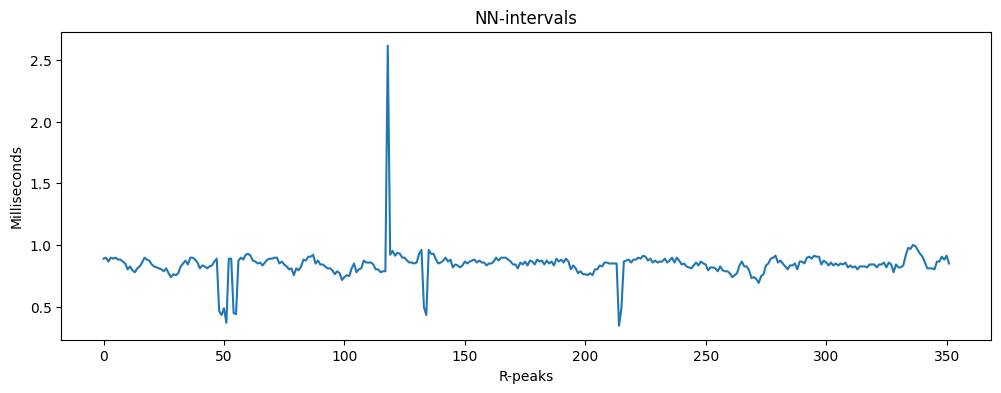

In [8]:
# Visualize the NN intervals
plt.figure(figsize=(12, 4))
plt.plot(nn_intervals)
plt.title('NN-intervals')
plt.xlabel('R-peaks')
plt.ylabel('Milliseconds')
plt.show()

#### 4.4 Calculte SDNN

SDNN is the standard deviation of the NN intervals.

In [9]:
# Calculate the standard deviation of the NN intervals
sdnn = np.std(nn_intervals)
print('SDNN:', sdnn, 'milliseconds')


SDNN: 0.1256162066311218 milliseconds


#### 4.5 Remove outliers

Check the your visualization of the NN-intervals above. Are there outliers? Try to remove them. Recalculate SDNN. Does it change?

#### 4.6 Answer the remainung question in the moodle quiz

After going through this steps without and with cleaning - please answer the remaining questions in moodle.

---------

Below you find additional material, to try out more features of neurokit2

## 5. Time-Domain Analysis with Neurokit2

**To do:** Use [hrv_time()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-time) to calculate various time-domain features. Compare with your calculation. Use `show=True` to visualize the distribution of the RR intervals.

**Note: If you do your cleaning and artifact removal properly, there are only a few or none outliers. A distribution without outliers looks like this:**

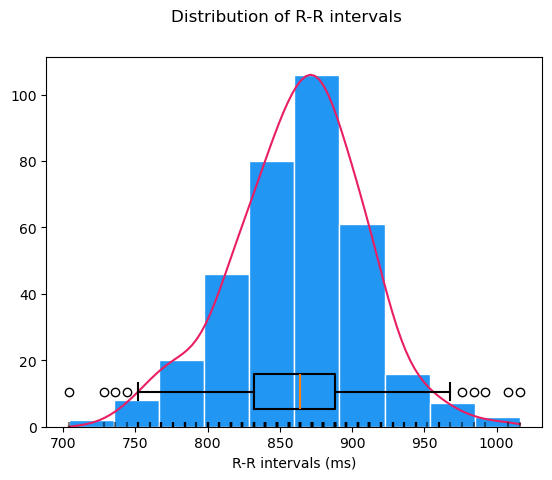

## 6. Frequency-Domain Analysis

Now, let's extract the frequency domain features, which involve extracting for example the spectral power density pertaining to different frequency bands. Again, you can visualize the power across frequency bands by specifying `show=True` in [hrv_frequency()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-frequency).

## 7. Non-Linear Domain Analysis

Now, let's compute the non-linear indices with [hrv_nonlinear()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-nonlinear).

**Question: What is the Poincaré plot good for?**

This will produce a Poincaré plot which plots each RR interval against the next successive one.

Note that there exist many more [**complexity indices**](https://neuropsychology.github.io/NeuroKit/functions/complexity.html), that are available in NeuroKit2, and that could be applied to HRV. The ``hrv_nonlinear()`` function only includes the most commonly used indices.